In [1]:
# Use the edgelist CSV formatted file to build graphs for visualization (Networkx. matplotlib) 
import os
import pandas as pd
import numpy as np
import csv

import networkx as nx

# matplotlib graphs will be included in notebook
%matplotlib inline
import matplotlib.pyplot as plt

# Where to save the figures
PROJECT_ROOT_DIR = "."

def save_fig(filename, tight_layout=True):
    data_path = os.path.join(PROJECT_ROOT_DIR, "images")    
    if not os.path.isdir(data_path):
        os.makedirs(data_path)
    
    fullpath_filename = os.path.join(data_path, filename + ".png")
    print("Saving image : ", fullpath_filename)
    
    if tight_layout:
        plt.tight_layout()
        
    plt.savefig(fullpath_filename, format='png', dpi=300)

In [2]:
plt.rcParams.update({
    'figure.figsize': (7.5, 7.5),
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False})

In [3]:
df = pd.read_csv('./datasets/BhowmickSouravS_noTags.csv') # "./datasets/WooiBoon_dblp_noTags.xml.csv"
df

,Author,Venue
0,Sourav S. Bhowmick,PVLDB
1,Renchi Yang,PVLDB
2,Jieming Shi,PVLDB
3,Xiaokui Xiao,PVLDB
4,Yin Yang,PVLDB
5,Sourav S. Bhowmick,PVLDB
6,Meng Wang 0015,ACM TIST
7,Hui Li 0005,ACM TIST
8,Jiangtao Cui,ACM TIST
9,Sourav S. Bhowmick,ACM TIST


In [4]:
authors = list(df.Author.unique())
print("Total no. of unique authors :", len(authors))

authors

Total no. of unique authors : 175


['Sourav S. Bhowmick',
 'Renchi Yang',
 'Jieming Shi',
 'Xiaokui Xiao',
 'Yin Yang',
 'Meng Wang 0015',
 'Hui Li 0005',
 'Jiangtao Cui',
 'Ping Liu',
 'Yijun Duan',
 'Adam Jatowt',
 'Masatoshi Yoshikawa',
 'Jin Yao Chin',
 'Xi Lin',
 'Yequan Wang',
 'Zengxiang Li',
 'Ricardo Campos 0001',
 'Antoine Doucet',
 'Chaohui Wang',
 'Miao Xie',
 'Byron Choi',
 'Shuigeng Zhou',
 'Nathan Ng',
 'Peipei Yi',
 'Zhiwei Zhang',
 'Jianliang Xu',
 'Christina Lui',
 'Kai Huang',
 'Huey Eng Chua',
 'Zhewei Wei',
 'Jun Zhao',
 'Rong Hua Li',
 'Siyuan Liu',
 'Wanlu Zhang',
 'Shu Wang',
 'Wanyi Huang',
 'Shafiq R. Joty',
 'Yating Zhang',
 'Yuji Matsumoto 0001',
 'Mengting Xu',
 'Changsheng Sun',
 'Zhongyuan Jiang',
 'Chengkai Li',
 'Jie Zheng',
 'Hao Su',
 'Gao Cong',
 'Wook Shin Han',
 'Nina Tahmasebi',
 'Kaiyu Feng',
 'Tao Guo',
 'Shuai Ma 0001',
 'Boon Siew Seah',
 'Aixin Sun',
 'Min Min Chew',
 'Yinglong Song',
 'Siyuan Wu',
 'Leong Hou U',
 'Wolfgang Gatterbauer',
 'Arijit Khan',
 'Francesco Bonchi',
 

In [5]:
venues = sorted(list(df.Venue.unique()))
print("Total no. of unique venues (incl. NoJ) :", len(venues))

venues

Total no. of unique venues (incl. NoJ) : 22


['ACM Comput. Surv.',
 'ACM TIST',
 'BMC Bioinformatics',
 'BMC Systems Biology',
 'Bioinformatics',
 'CoRR',
 'Comput. J.',
 'Data Knowl. Eng.',
 'Data Min. Knowl. Discov.',
 'Data Science and Engineering',
 'Distributed and Parallel Databases',
 'IEEE Trans. Knowl. Data Eng.',
 'IEEE Trans. Services Computing',
 'Inf. Sci.',
 'Inf. Softw. Technol.',
 'Inf. Syst.',
 'JASIST',
 'NoJ',
 'PVLDB',
 'SIGMOD Record',
 'VLDB J.',
 'World Wide Web']

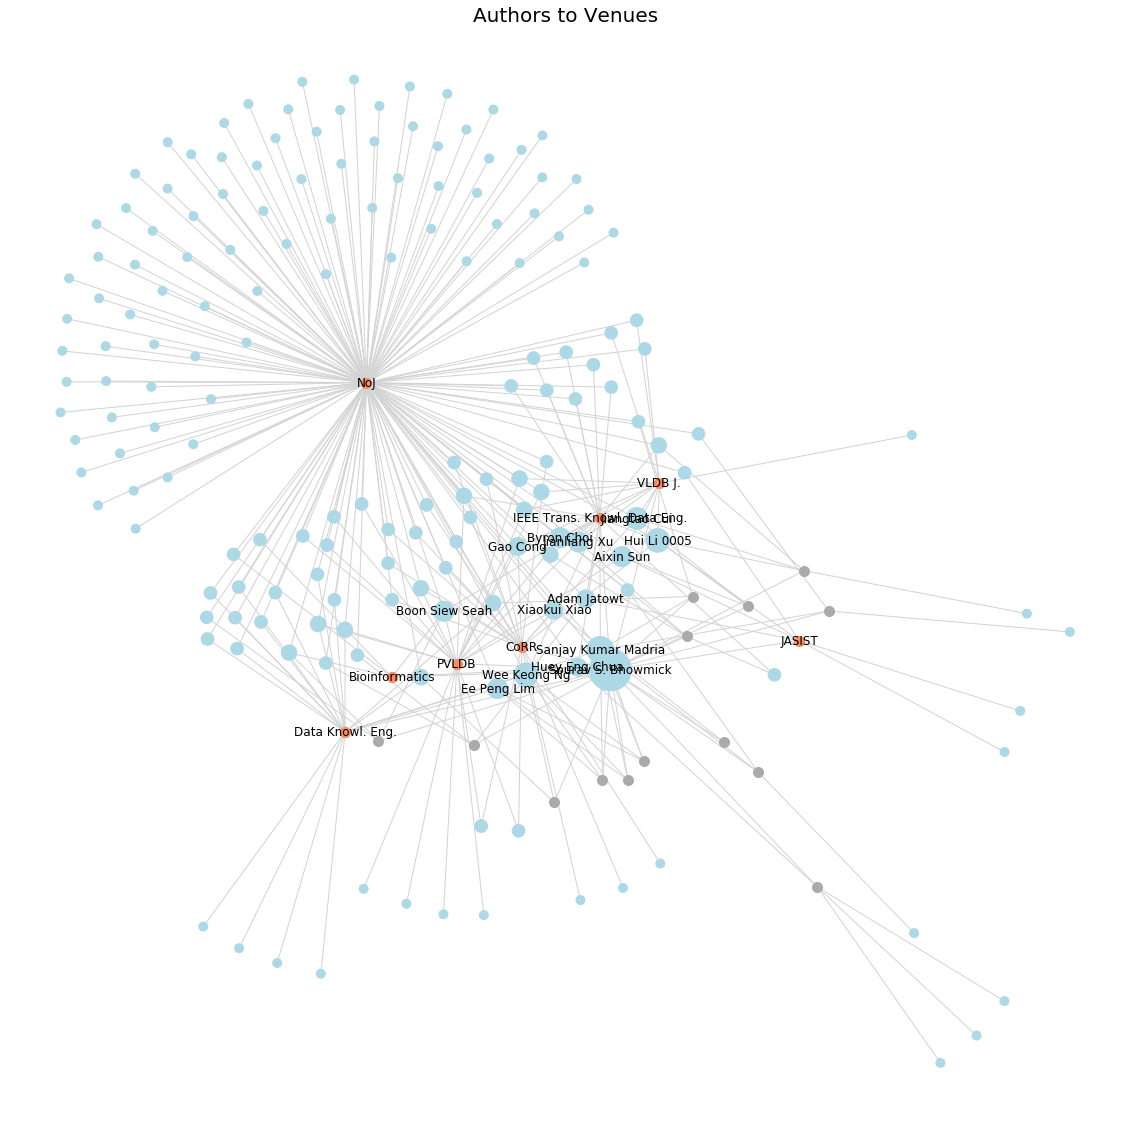

In [6]:
Graphtype = nx.Graph()

# 1. Create the graph
g = nx.from_pandas_edgelist(df, source='Author', target='Venue', create_using=Graphtype)

#layout = nx.spring_layout(g)

# 2. Create a layout for our nodes 
layout = nx.spring_layout(g,iterations=50)

plt.figure(figsize=(20, 20))

# 3. Draw the relevant graph with nodes and links
# People small and grey

# Labels for authors ONLY
# People who are highly connected are a highlighted color

# Obtain degree of authors and multiply by 80 to get the circle size
# The respective size is proportional to the number of connections, degree
author_size = [g.degree(author) * 80 for author in authors]

# List of Author nodes are determined from the author list and displayed nodes in lightblue
nx.draw_networkx_nodes(g, 
                       layout, 
                       nodelist=authors, 
                       node_size=author_size, # a list of sizes, based on degree centrality
                       node_color='lightblue')

# List of Venue nodes are determined from the author list and displayed nodes in grey
nx.draw_networkx_nodes(g, layout, nodelist=venues, node_color='#AAAAAA', node_size=100) #cccccc

# Create a list of popular venues
popular_venues = [venue for venue in venues if g.degree(venue) > 5]
# Create a list of popular authors
popular_authors = [author for author in authors if g.degree(author) > 3]


# List of popular venue nodes are determined from the popular_venues list and displayed nodes in orange
nx.draw_networkx_nodes(g, layout, nodelist=popular_venues, node_color='#fc8d62', node_size=100) # orange

# Links/Edges are thin and displayed in lightgrey
nx.draw_networkx_edges(g, layout, width=1, edge_color="lightgrey") #cccccc

# Label the Venues
venue_labels = dict(zip(venues, venues))
popular_venues_labels = dict(zip(popular_venues, popular_venues))


# Label the authors
authors_labels = dict(zip(authors, authors))
popular_authors_labels = dict(zip(popular_authors, popular_authors))

nx.draw_networkx_labels(g, layout, labels=popular_authors_labels) # author_labels
nx.draw_networkx_labels(g, layout, labels=popular_venues_labels) # venue_labels


# 4. Turn off the axis
#plt.axis('off')
#nx.draw_networkx(g, layout)

plt.title("Authors to Venues", fontsize=20)
#save_fig("WooiBoon_graph")
#save_fig("BhowmickSouravS_graph")


# To remove node label coordinates and have matplotlib to show display
plt.show()

In [7]:
len(g.nodes) # Total no. of authors (175) and journals (22)

197

In [8]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 197
Number of edges: 323
Average degree:   3.2792


In [9]:
degree_dict = (dict(g.degree))
degree_dict_values = degree_dict.values()
degree_dict_keys = degree_dict.keys()

max_dict_value = max(degree_dict_values)
max_dict_key = max(degree_dict, key=lambda k: degree_dict[k])

print("Degree Dictionary : ", degree_dict)
print("Max. degree : ", max_dict_value)
print("Max. degree key : ", max_dict_key)

Degree Dictionary :  {'Sourav S. Bhowmick': 22, 'PVLDB': 24, 'Renchi Yang': 3, 'Jieming Shi': 2, 'Xiaokui Xiao': 4, 'Yin Yang': 2, 'Meng Wang 0015': 3, 'ACM TIST': 5, 'Hui Li 0005': 7, 'Jiangtao Cui': 6, 'Ping Liu': 1, 'Yijun Duan': 2, 'Data Science and Engineering': 4, 'Adam Jatowt': 4, 'Masatoshi Yoshikawa': 2, 'Jin Yao Chin': 2, 'JASIST': 7, 'Xi Lin': 1, 'NoJ': 152, 'Yequan Wang': 1, 'Zengxiang Li': 1, 'Ricardo Campos 0001': 1, 'Antoine Doucet': 1, 'Chaohui Wang': 1, 'Miao Xie': 3, 'Byron Choi': 5, 'Shuigeng Zhou': 3, 'Nathan Ng': 1, 'Peipei Yi': 3, 'Zhiwei Zhang': 1, 'Jianliang Xu': 5, 'Christina Lui': 1, 'Kai Huang': 2, 'Huey Eng Chua': 4, 'Zhewei Wei': 2, 'Jun Zhao': 2, 'Rong Hua Li': 2, 'Siyuan Liu': 2, 'Wanlu Zhang': 2, 'Shu Wang': 2, 'Wanyi Huang': 2, 'Shafiq R. Joty': 1, 'Yating Zhang': 2, 'Yuji Matsumoto 0001': 1, 'CoRR': 22, 'Mengting Xu': 1, 'Changsheng Sun': 1, 'Zhongyuan Jiang': 1, 'Chengkai Li': 1, 'Bioinformatics': 6, 'Jie Zheng': 2, 'Hao Su': 1, 'Gao Cong': 4, 'Wook S

In [10]:
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
dmax = max(degree_sequence)

print("Sorted degree sequence :", degree_sequence)
print("Max. degree :", dmax)

Sorted degree sequence : [152, 24, 22, 22, 21, 21, 14, 9, 7, 7, 7, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Max. degree : 152


In [11]:
# Verify total number of publications for author from python script
publications_list = [1, 1, 1, 1, 4, 6, 2, 20, 1, 1, 1, 9, 1, 1, 1, 1, 3, 178, 11, 1, 5, 1]
sum(publications_list)

251

# End of Program